## Data Cleaning and Preprocessing

Using data from three distinct samples (<i>N</i>=800), the purpose of this project is to cluster individuals across the Big Five personality dimensions as a way of identifying latent personality profiles.

Before performing the anayses, it is necessary to prepare the data by:
1. Excluding inattentive participants who failed an attention check and participants with largely missing data in each dataset
2. Dropping columns that are not related to personality traits in each dataset
3. Converting personality trait item score columns to numeric datatypes in each dataset
4. Concatenating the three datasets into one integrated dataset
5. Recoding relevant items that are negatively framed
6. Computing the Big Five personality trait scores

These processing steps can be seen in this script, and the cluster analyses on the resulting dataset can be seen in the accompanying <b>"Personality Trait Cluster Analysis.ipynb"</b>.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

#### Retrieving and Examining Raw Data

Each of the three datasets contains data relating to personality traits, demographic characteristics, moral judgment responses, and survey metadata. Personalty trait item score columns start with either <b>"BF"</b> or <b>"BFI"</b>.

In [2]:
s1_df = pd.read_csv("datasets/Big Five_Study 1_For Aggregation.csv")
s2_df = pd.read_csv("datasets/Big Five_Study 2_For Aggregation.csv")
s3_df = pd.read_spss("datasets/TS_Time 1_For Aggregation.sav")

In [3]:
studies = [
    {"name": "Study 1", "data": s1_df},
    {"name": "Study 2", "data": s2_df},
    {"name": "Study 3", "data": s3_df}
]

for study in studies:
    print(f"First three rows of {study['name']}:")
    display(study["data"].head(3))

First three rows of Study 1:


,Subject,Age,BFI1,BFI10,BFI11,BFI12,BFI13,BFI14,BFI15,BFI16,BFI17,BFI18,BFI19,BFI2,BFI20,BFI21,BFI22,BFI23,BFI24,BFI25,BFI26,BFI27,BFI28,BFI29,BFI3,BFI30,BFI4,BFI5,BFI6,BFI7,BFI8,BFI9,Education,Ethnicity_1,Ethnicity_2_01,Ethnicity_2_02,Ethnicity_2_03,Ethnicity_2_04,Ethnicity_2_05,Ethnicity_2_06,Gender,PO_Econ,PO_Gen,PO_Soc,a01accon,a01acinc,a01incon,a01ininc,a02accon,a02acinc,a02incon,a02ininc,a03accon,a03acinc,a03incon,a03ininc,a04accon,a04acinc,a04incon,a04ininc,a05accon,a05acinc,a05incon,a05ininc,a06accon,a06acinc,a06incon,a06ininc,a07accon,a07acinc,a07incon,a07ininc,a08accon,a08acinc,a08incon,a08ininc,a09accon,a09acinc,a09incon,a09ininc,a10accon,a10acinc,a10incon,a10ininc,a11accon,a11acinc,a11incon,a11ininc,a12accon,a12acinc,a12incon,a12ininc,ta01accon,ta01acinc,ta01incon,ta01ininc,ta02accon,ta02acinc,ta02incon,ta02ininc,ta03accon,ta03acinc,ta03incon,ta03ininc,ta04accon,ta04acinc,ta04incon,ta04ininc,ta05accon,ta05acinc,ta05incon,ta05ininc,ta06accon,ta06acinc,ta06incon,ta06ininc,ta07accon,ta07acinc,ta07incon,ta07ininc,ta08accon,ta08acinc,ta08incon,ta08ininc,ta09accon,ta09acinc,ta09incon,ta09ininc,ta10accon,ta10acinc,ta10incon,ta10ininc,ta11accon,ta11acinc,ta11incon,ta11ininc,ta12accon,ta12acinc,ta12incon,ta12ininc,td01accon,td01acinc,td01incon,td01ininc,td02accon,td02acinc,td02incon,td02ininc,td03accon,td03acinc,td03incon,td03ininc,td04accon,td04acinc,td04incon,td04ininc,td05accon,td05acinc,td05incon,td05ininc,td06accon,td06acinc,td06incon,td06ininc,td07accon,td07acinc,td07incon,td07ininc,td08accon,td08acinc,td08incon,td08ininc,td09accon,td09acinc,td09incon,td09ininc,td10accon,td10acinc,td10incon,td10ininc,td11accon,td11acinc,td11incon,td11ininc,td12accon,td12acinc,td12incon,td12ininc
0,1,19.0,4,2,3,3,5,4,3,2,1,2,3,5,3,3,4,3,4,2,3,3,5,1,3,3,4,4,3,3,4,2,2,2,0,1,0,0,0,0,1,4,4,4,2,2,1,2,2,2,1,1,2,2,1,1,2,2,1,1,2,2,1,2,2,1,1,1,2,2,1,2,2,2,1,2,2,2,1,2,2,1,1,2,2,2,1,1,2,2,1,1,3609,5300,3844,18520,3763,4002,6789,7649,2133,1620,2781,2675,2369,2374,9421,8456,4187,1906,4041,7879,1991,1500,3878,8328,2381,3641,12255,4785,3728,1484,3604,11782,2847,2577,10080,5397,3538,5438,3260,8954,7443,10009,9066,5131,2197,2734,2422,2672,14019,26961,18758,23806,18804,15140,20675,32597,22297,14312,33173,30133,15898,18569,29782,19250,33243,22641,22210,38065,14669,21997,21065,50421,29204,41062,48673,30736,49008,35621,29288,22373,22686,21471,38746,29094,24282,29106,21172,46517,33192,16016,39228,31277,17604,17319,25274,44142
1,2,18.0,2,2,5,2,4,3,4,4,2,4,4,3,2,4,4,3,4,3,2,4,4,4,1,1,4,5,1,2,3,2,2,2,0,0,0,1,0,0,2,4,4,4,2,1,1,2,2,2,1,1,1,1,2,2,2,1,1,1,1,2,2,2,1,1,2,2,1,2,1,2,2,2,1,1,2,2,1,1,2,1,1,1,2,2,1,1,2,2,1,1,3079,4877,2772,3450,3109,4527,3949,10301,2764,1839,9745,1434,2311,8092,3466,2831,2715,923,4199,4719,1330,4497,3459,5535,2680,4234,7400,3111,2997,2625,3203,8766,5746,8890,2750,4269,3000,1513,2669,4446,5980,3156,6077,3896,2559,1860,2703,2077,6158,23311,30951,21112,6707,12877,13983,18713,10006,22704,19742,30905,13384,6362,18374,10784,14443,8725,18108,26536,9691,16830,20410,18126,7955,32351,31513,21120,24721,7780,7568,13437,19420,4426,23400,23565,21235,24516,29428,34811,36327,50954,22871,42040,22729,23365,19826,17668
2,3,18.0,1,2,4,3,3,3,3,4,4,3,2,4,2,2,4,3,2,3,2,4,4,4,4,2,4,5,4,4,4,4,2,1,1,0,0,0,0,0,2,2,2,2,2,1,1,2,1,1,2,2,2,1,1,2,2,1,1,2,2,1,2,2,1,1,2,2,2,1,1,2,2,1,2,2,1,1,2,2,2,1,1,2,2,2,1,2,2,2,1,2,2195,2985,2359,2810,2897,2022,3356,13028,3198,1528,5204,3512,2921,2353,4545,4586,2698,3372,3281,6219,2735,1657,3293,2485,2891,14241,4230,3219,10269,1699,2403,2719,9443,2781,6095,5097,2678,1918,2516,3432,2675,6394,5658,3180,2094,7507,1813,3655,12980,183218,25765,10820,18894,123557,14627,19511,15594,9761,17826,76721,10052,21017,33811,12345,17858,26487,16243,22466,33057,12972,39116,64147,41529,37304,45352,33058,25483,254090,18065,19717,11985,10016,22042,18083,26133,15219,16019,76832,21843,18764,39739,18516,32137,12751,34465,24179


First three rows of Study 2:


,BE_1,BE_2,BF1,BF2,BF3,BF4,BF5,BF6,BF7,BF8,BF9,BF10,BF11,BF12,BF13,BF14,BF15,BF16,BF17,BF18,BF19,BF20,BF21,BF22,BF23,BF24,BF25,BF26,BF27,BF28,BF29,BF30,d8accon,d8accont_First Click,d8accont_Last Click,d8accont_Page Submit,d8accont_Click Count,d2ininc,d2ininct_First Click,d2ininct_Last Click,d2ininct_Page Submit,d2ininct_Click Count,d11incon,d11incont_First Click,d11incont_Last Click,d11incont_Page Submit,d11incont_Click Count,d9incon,d9incont_First Click,d9incont_Last Click,d9incont_Page Submit,d9incont_Click Count,d6ininc,d6ininct_First Click,d6ininct_Last Click,d6ininct_Page Submit,d6ininct_Click Count,d7incon,d7incont_First Click,d7incont_Last Click,d7incont_Page Submit,d7incont_Click Count,d1acinc,d1acinct_First Click,d1acinct_Last Click,d1acinct_Page Submit,d1acinct_Click Count,d4incon,d4incont_First Click,d4incont_Last Click,d4incont_Page Submit,d4incont_Click Count,d10ininc,d10ininct_First Click,d10ininct_Last Click,d10ininct_Page Submit,d10ininct_Click Count,d12ininc,d12ininct_First Click,d12ininct_Last Click,d12ininct_Page Submit,d12ininct_Click Count,d3ininc,d3ininct_First Click,d3ininct_Last Click,d3ininct_Page Submit,d3ininct_Click Count,d5ininc,d5ininct_First Click,d5ininct_Last Click,d5ininct_Page Submit,d5ininct_Click Count,d1ininc,d1ininct_First Click,d1ininct_Last Click,d1ininct_Page Submit,d1ininct_Click Count,d9accon,d9accont_First Click,d9accont_Last Click,d9accont_Page Submit,d9accont_Click Count,d12accon,d12accont_First Click,d12accont_Last Click,d12accont_Page Submit,d12accont_Click Count,d11accon,d11accont_First Click,d11accont_Last Click,d11accont_Page Submit,d11accont_Click Count,d3incon,d3incont_First Click,d3incont_Last Click,d3incont_Page Submit,d3incont_Click Count,d5accon,d5accont_First Click,d5accont_Last Click,d5accont_Page Submit,d5accont_Click Count,d2acinc,d2acinct_First Click,d2acinct_Last Click,d2acinct_Page Submit,d2acinct_Click Count,d7acinc,d7acinct_First Click,d7acinct_Last Click,d7acinct_Page Submit,d7acinct_Click Count,d4acinc,d4acinct_First Click,d4acinct_Last Click,d4acinct_Page Submit,d4acinct_Click Count,d8acinc,d8acinct_First Click,d8acinct_Last Click,d8acinct_Page Submit,d8acinct_Click Count,d6accon,d6accont_First Click,d6accont_Last Click,d6accont_Page Submit,d6accont_Click Count,d10acinc,d10acinct_First Click,d10acinct_Last Click,d10acinct_Page Submit,d10acinct_Click Count,d5acinc,d5acinct_First Click,d5acinct_Last Click,d5acinct_Page Submit,d5acinct_Click Count,d2incon,d2incont_First Click,d2incont_Last Click,d2incont_Page Submit,d2incont_Click Count,d4accon,d4accont_First Click,d4accont_Last Click,d4accont_Page Submit,d4accont_Click Count,d11ininc,d11ininct_First Click,d11ininct_Last Click,d11ininct_Page Submit,d11ininct_Click Count,d10accon,d10accont_First Click,d10accont_Last Click,d10accont_Page Submit,d10accont_Click Count,d7ininc,d7ininct_First Click,d7ininct_Last Click,d7ininct_Page Submit,d7ininct_Click Count,d6incon,d6incont_First Click,d6incont_Last Click,d6incont_Page Submit,d6incont_Click Count,d8ininc,d8ininct_First Click,d8ininct_Last Click,d8ininct_Page Submit,d8ininct_Click Count,d3accon,d3accont_First Click,d3accont_Last Click,d3accont_Page Submit,d3accont_Click Count,d1incon,d1incont_First Click,d1incont_Last Click,d1incont_Page Submit,d1incont_Click Count,d9ininc,d9ininct_First Click,d9ininct_Last Click,d9ininct_Page Submit,d9ininct_Click Count,d12incon,d12incont_First Click,d12incont_Last Click,d12incont_Page Submit,d12incont_Click Count,d11acinc,d11acinct_First Click,d11acinct_Last Click,d11acinct_Page Submit,d11acinct_Click Count,d2accon,d2accont_First Click,d2accont_Last Click,d2accont_Page Submit,d2accont_Click Count,d1accon,d1accont_First Click,d1accont_Last Click,d1accont_Page Submit,d1accont_Click Count,d3acinc,d3acinct_First Click,d3acinct_Last Click,d3acinct_Page Submit,d3acinct_Click Count,d12acinc,d12acinct_First Click,d12acinct_Last Click,d12acinct_Page Submit,d12acinct_Click Count,d5incon,d5incont_First Click,d5incont_Last Click,d5incont_Page

First three rows of Study 3:


,StartDate,EndDate,Status,Progress,Duration__in_seconds_,Finished,RecordedDate,ResponseId,BE_1,BE_2,BF1,BF2,BF3,BF4,BF5,BF6,BF7,BF8,BF9,BF10,BF11,BF12,BF13,BF14,BF15,BF16,BF17,BF18,BF19,BF20,BF21,BF22,BF23,BF24,BF25,BF26,BF27,BF28,BF29,BF30,d8accon,d8accont_First_Click,d8accont_Last_Click,d8accont_Page_Submit,d8accont_Click_Count,d2ininc,d2ininct_First_Click,d2ininct_Last_Click,d2ininct_Page_Submit,d2ininct_Click_Count,d11incon,d11incont_First_Click,d11incont_Last_Click,d11incont_Page_Submit,d11incont_Click_Count,d9incon,d9incont_First_Click,d9incont_Last_Click,d9incont_Page_Submit,d9incont_Click_Count,d6ininc,d6ininct_First_Click,d6ininct_Last_Click,d6ininct_Page_Submit,d6ininct_Click_Count,d7incon,d7incont_First_Click,d7incont_Last_Click,d7incont_Page_Submit,d7incont_Click_Count,d1acinc,d1acinct_First_Click,d1acinct_Last_Click,d1acinct_Page_Submit,d1acinct_Click_Count,d4incon,d4incont_First_Click,d4incont_Last_Click,d4incont_Page_Submit,d4incont_Click_Count,d10ininc,d10ininct_First_Click,d10ininct_Last_Click,d10ininct_Page_Submit,d10ininct_Click_Count,d12ininc,d12ininct_First_Click,d12ininct_Last_Click,d12ininct_Page_Submit,d12ininct_Click_Count,d3ininc,d3ininct_First_Click,d3ininct_Last_Click,d3ininct_Page_Submit,d3ininct_Click_Count,d5ininc,d5ininct_First_Click,d5ininct_Last_Click,d5ininct_Page_Submit,d5ininct_Click_Count,d1ininc,d1ininct_First_Click,d1ininct_Last_Click,d1ininct_Page_Submit,d1ininct_Click_Count,d9accon,d9accont_First_Click,d9accont_Last_Click,d9accont_Page_Submit,d9accont_Click_Count,d12accon,d12accont_First_Click,d12accont_Last_Click,d12accont_Page_Submit,d12accont_Click_Count,d11accon,d11accont_First_Click,d11accont_Last_Click,d11accont_Page_Submit,d11accont_Click_Count,d3incon,d3incont_First_Click,d3incont_Last_Click,d3incont_Page_Submit,d3incont_Click_Count,d5accon,d5accont_First_Click,d5accont_Last_Click,d5accont_Page_Submit,d5accont_Click_Count,d2acinc,d2acinct_First_Click,d2acinct_Last_Click,d2acinct_Page_Submit,d2acinct_Click_Count,d7acinc,d7acinct_First_Click,d7acinct_Last_Click,d7acinct_Page_Submit,d7acinct_Click_Count,d4acinc,d4acinct_First_Click,d4acinct_Last_Click,d4acinct_Page_Submit,d4acinct_Click_Count,d8acinc,d8acinct_First_Click,d8acinct_Last_Click,d8acinct_Page_Submit,d8acinct_Click_Count,d6accon,d6accont_First_Click,d6accont_Last_Click,d6accont_Page_Submit,d6accont_Click_Count,d10acinc,d10acinct_First_Click,d10acinct_Last_Click,d10acinct_Page_Submit,d10acinct_Click_Count,d5acinc,d5acinct_First_Click,d5acinct_Last_Click,d5acinct_Page_Submit,d5acinct_Click_Count,d2incon,d2incont_First_Click,d2incont_Last_Click,d2incont_Page_Submit,d2incont_Click_Count,d4accon,d4accont_First_Click,d4accont_Last_Click,d4accont_Page_Submit,d4accont_Click_Count,d11ininc,d11ininct_First_Click,d11ininct_Last_Click,d11ininct_Page_Submit,d11ininct_Click_Count,d10accon,d10accont_First_Click,d10accont_Last_Click,d10accont_Page_Submit,d10accont_Click_Count,d7ininc,d7ininct_First_Click,d7ininct_Last_Click,d7ininct_Page_Submit,d7ininct_Click_Count,d6incon,d6incont_First_Click,d6incont_Last_Click,d6incont_Page_Submit,d6incont_Click_Count,d8ininc,d8ininct_First_Click,d8ininct_Last_Click,d8ininct_Page_Submit,d8ininct_Click_Count,d3accon,d3accont_First_Click,d3accont_Last_Click,d3accont_Page_Submit,d3accont_Click_Count,d1incon,d1incont_First_Click,d1incont_Last_Click,d1incont_Page_Submit,d1incont_Click_Count,d9ininc,d9ininct_First_Click,d9ininct_Last_Click,d9ininct_Page_Submit,d9ininct_Click_Count,d12incon,d12incont_First_Click,d12incont_Last_Click,d12incont_Page_Submit,d12incont_Click_Count,d11acinc,d11acinct_First_Click,d11acinct_Last_Click,d11acinct_Page_Submit,d11acinct_Click_Count,d2accon,d2accont_First_Click,d2accont_Last_Click,d2accont_Page_Submit,d2accont_Click_Count,d1accon,d1accont_First_Click,d1accont_Last_Click,d1accont_Page_Submit,d1accont_Click_Count,d3acinc,d3acinct_First_Click,d3acinct_Last_Click,d3acinct_Page_Submit,d3acinct_Click_Count,d12acinc,d12acinct_First_Click,d12acinct_Last_Click,d12acinct_Page_Su

#### Excluding Participants who Failed the Attention Check or have Majority Missing Data

Studies 2 and 3 included an attention check measure to identify inattentive participants, so participants who failed this attention check should be filtered out of the analyses.

In [4]:
passed_ac_s2 = s2_df["Attention_Check"].isna()

passed_ac_s3 = (s3_df
                .loc[:, s3_df.columns.str.startswith("Attention_Check")]
                .isna()
                .all(axis=1))

passed_ac = [passed_ac_s2, passed_ac_s3]

for study, passed in zip(studies[1:], passed_ac):
    print(f"Participants in {study['name']} before exclusions: {len(study['data'])}")
    
    study["data"] = study["data"].loc[passed].copy()
    
    print(f"Participants in {study['name']} after exclusions: {len(study['data'])}")

Participants in Study 2 before exclusions: 293
Participants in Study 2 after exclusions: 253
Participants in Study 3 before exclusions: 348
Participants in Study 3 after exclusions: 316


Studies 2 and 3 also allowed participants to skip personality trait items, which allows for missing data. I will first examine the rates of missing data on personality trait item scores per participant.

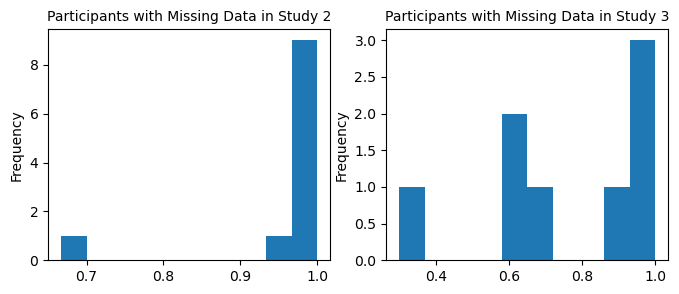

In [5]:
personality_columns = s2_df.columns[s2_df.columns.str.startswith("BF")].tolist()

fig, axs = plt.subplots(figsize=(8, 3), nrows=1, ncols=2)

for ax, study in zip(axs, studies[1:]):
    miss_data_total = study["data"].loc[:, personality_columns].isna().mean(axis=1)
    
    ax = miss_data_total[miss_data_total > 0].plot(kind="hist", ax=ax)    
    ax.set_title(f"Participants with Missing Data in {study['name']}", size=10)

Participants who are missing data tend to be missing data on the majority of columns. Therefore, I will exclude these participants from the clustering analyses.

In [6]:
for study in studies[1:]:
    print(f"Participants in {study['name']} before exclusions: {len(study['data'])}")
    
    no_missing_data = study["data"][personality_columns].isna().sum(axis=1) == 0
    
    study["data"] = study["data"][no_missing_data].copy()
    
    print(f"Participants in {study['name']} after exclusions: {len(study['data'])}")

Participants in Study 2 before exclusions: 253
Participants in Study 2 after exclusions: 242
Participants in Study 3 before exclusions: 316
Participants in Study 3 after exclusions: 308


#### Dropping Columns not related to Personality Traits

Next, I will drop features not related to personality traits. Given that personality trait features have different names in Study 1 (e.g., <b>"BFI1"</b>) than in Studies 2 and 3 (e.g., <b>"BF1"</b>), I will first convert the names of personality trait features in Study 1.

In [7]:
s1_df.columns = s1_df.columns.str.replace("BFI", "BF")

for study in studies:
    print(f"Columns in {study['name']} before dropping: {study['data'].shape[1]}")
    
    cols_to_drop = study["data"].columns[~study["data"].columns.isin(personality_columns)]
    
    study["data"] = study["data"].drop(cols_to_drop, axis=1)
    
    print(f"Columns in {study['name']} after dropping: {study['data'].shape[1]}")

Columns in Study 1 before dropping: 188
Columns in Study 1 after dropping: 30
Columns in Study 2 before dropping: 284
Columns in Study 2 after dropping: 30
Columns in Study 3 before dropping: 305
Columns in Study 3 after dropping: 30


#### Recoding Values for Studies 2 and 3 to Numeric Values 

The values for personality trait features in studies 2 and 3 are encoding as strings (e.g., "agree", "disagree") and should be encoded to numeric matching the same values as Study 1.

In [8]:
value_mapping = {
    "Disagree strongly": 1,
    "Disagree": 2,
    "Neither agree nor disagree": 3,
    "Agree": 4,
    "Agree strongly": 5
}

for study in studies[1:]:
    study["data"] = study["data"].applymap(lambda x: value_mapping[x], na_action="ignore")

#### Concatenating Studies 1, 2 and 3

In [9]:
study_names, study_data = zip(*[study.values() for study in studies])

integrated_df = pd.concat(study_data, axis=0, keys=study_names)

integrated_df.head(3)

print(f"Shape of integrated dataset: {integrated_df.shape}")

Shape of integrated dataset: (800, 30)


#### Reverse-coding Relevant Items

Before computing Big Five personality trait scores, many of the personality trait items scores are negatively framed and therefore should be reverse-coded.

In [10]:
rc_item_nums = [1, 3, 7, 8, 10, 14, 17, 19, 20, 21, 24, 26, 27, 28, 30]

rc_cols = [f"BF{i}" for i in rc_item_nums]

integrated_df = (integrated_df
                 .apply(lambda x: 6-x if x.name in rc_cols else x)
                 .rename(columns=lambda x: x+"R" if x in rc_cols else x))

integrated_df.head(3)

BF1R  BF10R  BF11  BF12  BF13  BF14R  BF15  BF16  BF17R  BF18  \
Study 1 0     2      4     3     3     5      2     3     2      5     2   
        1     4      4     5     2     4      3     4     4      4     4   
        2     5      4     4     3     3      3     3     4      2     3   

           BF19R  BF2  BF20R  BF21R  BF22  BF23  BF24R  BF25  BF26R  BF27R  \
Study 1 0      3    5      3      3     4     3      2     2      3      3   
        1      2    3      4      2     4     3      2     3      4      2   
        2      4    4      4      4     4     3      4     3      4      2   

           BF28R  BF29  BF3R  BF30R  BF4  BF5  BF6  BF7R  BF8R  BF9  
Study 1 0      1     1     3      3    4    4    3     3     2    2  
        1      2     4     5      5    4    5    1     4     3    2  
        2      2     4     2      4    4    5    4     2     2    4

#### Computing Trait-level Scores

Finally, I will compute Big Five personality trait scores and save the final dataset containing the scores to a csv file, with study and subject number as a multiindex.

In [11]:
traits = {
    "Extraversion": ["BF1R", "BF16", "BF6", "BF21R", "BF11", "BF26R"],
    "Agreeableness": ["BF2", "BF17R", "BF7R", "BF22", "BF12", "BF27R"],
    "Conscientiousness": ["BF3R", "BF18", "BF8R", "BF23", "BF13", "BF28R"],
    "Neuroticism": ["BF4", "BF19R", "BF9", "BF24R", "BF14R", "BF29"],
    "Openness": ["BF5", "BF20R", "BF10R", "BF25", "BF15", "BF30R"] 
}

trait_values = {t: integrated_df[items].mean(axis=1).values for t, items in traits.items()}

df_traits = integrated_df.assign(**trait_values)[trait_values.keys()]

df_traits.head(3)

Extraversion  Agreeableness  Conscientiousness  Neuroticism  \
Study 1 0      2.666667       3.833333           2.666667     2.333333   
        1      3.333333       3.166667           3.500000     2.833333   
        2      4.166667       2.833333           2.500000     3.833333   

           Openness  
Study 1 0  3.166667  
        1  4.166667  
        2  3.833333

In [12]:
df_traits.to_csv("datasets/personality_trait_data.csv", index_label=["study", "subject_id"])